# Laboratorio 3 - Parte 1

### K-means, GMMs

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### UdeA - 2018-II

#### Profesor: Antonio Tamayo Herrera

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Ejercicio 1

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al método KMeans de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

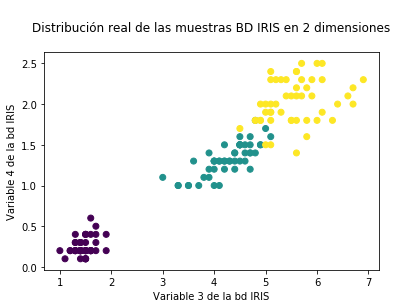



Descubriendo las clases con el método kMeans


Descubriendo 1 clusters:



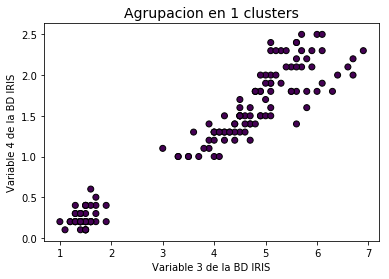

Descubriendo 2 clusters:



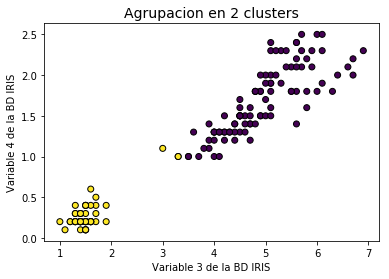

Descubriendo 3 clusters:



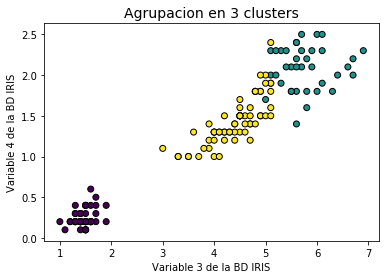

Descubriendo 4 clusters:



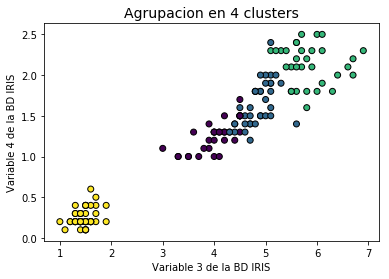

Descubriendo 5 clusters:



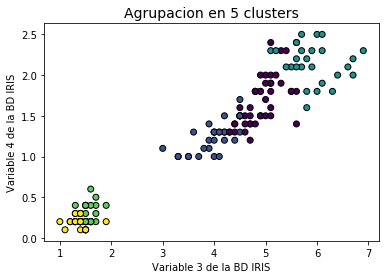

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

plt.scatter(X[:,2], X[:,3], c=y)
plt.title(u'\nDistribución real de las muestras BD IRIS en 2 dimensiones\n')
plt.xlabel('Variable 3 de la bd IRIS')
plt.ylabel('Variable 4 de la bd IRIS')
plt.show()

print('\n\nDescubriendo las clases con el método kMeans\n\n')

for k in range(1,6):
    
    print('Descubriendo ' + str(k) + ' clusters:\n')
    #Complete el código llamando al método KMeans usando inicialización de los centroides de manera aleatoria
    #usando las muestras de entrenamiento, tal como lo explicamos en clase. Use el algorímo EM para el
    #Entrenamiento
    kmeans = KMeans(init='random', n_clusters=k, n_init=1, algorithm='full')
    kmeans.fit(X)   #Compute k-means clustering
    Y = kmeans.predict(X)  #Predict the closest cluster each sample in X belongs to.
    plt.title('Agrupacion en %d clusters' % k, fontsize=14)
    plt.xlabel('Variable 3 de la BD IRIS')
    plt.ylabel('Variable 4 de la BD IRIS')
    labels = kmeans.labels_
    plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float), edgecolor='k')
    plt.show()
    
    

1.1 Seg&uacute;n los resultados encontrados y la base de datos usada, cu&aacute;l es el n&uacute;mero de clusters &oacute;ptimo para este problema? Argumente por qu&eacute;.

Responda aquí: Teniendo en cuenta que la base de datos IRIS cuenta con 3 clases de salida, el número de clusters más óptimo para esta base de datos es de 3. Dado este planteamiento, podemos ver una similitud significativa entre la gráfica de la base de datos IRIS y la gráfica de 3 clusters.

1.2 Escriba en sus palabras el algorítmo de Lloyd (variante de EM) con el cuál se entrena el modelo K-means.

Responda aquí: En este algoritmo únicamente se pone énfasis en encontrar las medias de cada cluster (Grupo), lo que en contexto de conoce como centroides. De esta manera, todos los puntos en un cluster están mas cercanos de su centroide que de cualquier otro centroide

1.3 Explique por qué, a pesar de garantizar que se aplique una metodología de validación correcta cuando se implemente el modelo K-means, se debe correr varias veces y observar el mejor resultado obtenido.

Responda aquí: Se sabe que la función puede encontrar mínimos locales e interpretarlos como el mínimo global, por lo que se debe correr varias veces buscando encontrar el mínimo global. 

## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo GMMs de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

iris = datasets.load_iris()

def class_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return "accuracy: " + str(1-(err/np.size(y_est)))

#Partiendo la base de datos de entrenamiento en 75% para entrenar y 25% para validar
skf = StratifiedKFold(n_splits=4)

train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))
#Complete el código aquí con la llamada al método GaussianMixture. Recuerde 
#que ya tiene el número de Gaussianas en n_classes
estimator = GaussianMixture(n_components = n_classes, covariance_type='spherical')

#Con la base de datos se realiza una inicialización de las medias de cada Gaussiana de manera supervisada
estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

#Complete el codigo aqui entrenando (ajustando) el modelo con la base de datos de entrenamiento
estimator.fit(X_train)

    
print ("Eficiencia en la fase de entrenamiento:")
y_train_pred = estimator.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print (train_accuracy)

print ("\nEficiencia en la fase de validación:")
#Complete el código aquí prediciendo el la clase para las muestras de validación

y_test_pred = estimator.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print (test_accuracy)

print ("\n")
print (class_error(y_test_pred, y_test))


Eficiencia en la fase de entrenamiento:
88.28828828828829

Eficiencia en la fase de validación:
92.3076923076923


accuracy: 0.9230769230769231


2.1 Ejecute el código de GMMs de la celda anterior usando una matriz de var-cov completa, esférica y diagonal. Qué observa en la eficiencia del modelo en cada uno de los tres casos? Cómo interpreta esos resultados?

Responda aquí: La matriz 'full' tiene mejor eficiencia que los otros dos tipos de matrices (diagonal y esférica), ya que los datos se pueden agrupar en parábolas o elípses con cualquier ángulo o dirección


2.2  Según el código anterior, se puede afirmar que se está aplicando la metodología de validación correctamente? Responda sí o no y por qué.

Responda aquí: No, porque es una metodología estratificada que se utiliza para bases de datos desbalanceadas, siendo iris una base de datos balanceada 

2.3 Qué se garantiza y que no se garantiza al entrenar el modelo GMMs con el algorítmo EM. Responda en términos de la verosimilitud del modelo entrenado con respecto a la base de datos de entrenamiento.

Responda aquí:
